In [22]:
import mysql.connector
import sqlalchemy as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = ''
)

In [3]:
con  #succesfully connected

In [4]:
c = con.cursor(buffered=True)
query = 'show databases'
c.execute(query)

In [5]:
c.fetchall()

[('flask_mysql',),
 ('information_schema',),
 ('invoicing',),
 ('mysql',),
 ('performance_schema',),
 ('practice',),
 ('retrowheels',),
 ('sakila',),
 ('sql_hr',),
 ('sql_inventory',),
 ('sql_invoicing',),
 ('sql_store',),
 ('store',),
 ('sys',),
 ('tips',),
 ('world',)]

In [6]:
query = 'USE world'
c.execute(query)

query = 'SHOW tables'
c.execute(query)

In [7]:
res = c.fetchall()
res

[('city',), ('country',), ('countrylanguage',)]

In [21]:
query = 'SELECT * FROM city'
c.execute(query)

res1 = c.fetchall()
res1[:5]

[(1, 'Kabul', 'AFG', 'Kabol', 1780000),
 (2, 'Qandahar', 'AFG', 'Qandahar', 237500),
 (3, 'Herat', 'AFG', 'Herat', 186800),
 (4, 'Mazar-e-Sharif', 'AFG', 'Balkh', 127800),
 (5, 'Amsterdam', 'NLD', 'Noord-Holland', 731200)]

In [18]:
query = 'SELECT * FROM country'
c.execute(query)

res2 = c.fetchall()
res2[:5]

[('ABW',
  'Aruba',
  'North America',
  'Caribbean',
  Decimal('193.00'),
  None,
  103000,
  Decimal('78.4'),
  Decimal('828.00'),
  Decimal('793.00'),
  'Aruba',
  'Nonmetropolitan Territory of The Netherlands',
  'Beatrix',
  129,
  'AW'),
 ('AFG',
  'Afghanistan',
  'Asia',
  'Southern and Central Asia',
  Decimal('652090.00'),
  1919,
  22720000,
  Decimal('45.9'),
  Decimal('5976.00'),
  None,
  'Afganistan/Afqanestan',
  'Islamic Emirate',
  'Mohammad Omar',
  1,
  'AF'),
 ('AGO',
  'Angola',
  'Africa',
  'Central Africa',
  Decimal('1246700.00'),
  1975,
  12878000,
  Decimal('38.3'),
  Decimal('6648.00'),
  Decimal('7984.00'),
  'Angola',
  'Republic',
  'José Eduardo dos Santos',
  56,
  'AO'),
 ('AIA',
  'Anguilla',
  'North America',
  'Caribbean',
  Decimal('96.00'),
  None,
  8000,
  Decimal('76.1'),
  Decimal('63.20'),
  None,
  'Anguilla',
  'Dependent Territory of the UK',
  'Elisabeth II',
  62,
  'AI'),
 ('ALB',
  'Albania',
  'Europe',
  'Southern Europe',
  Decim

In [54]:
query = 'SELECT * FROM countryLanguage'
c.execute(query)

res3 = c.fetchall()
res3[:5]

[('ABW', 'Dutch', 'T', Decimal('5.3')),
 ('ABW', 'English', 'F', Decimal('9.5')),
 ('ABW', 'Papiamento', 'F', Decimal('76.7')),
 ('ABW', 'Spanish', 'F', Decimal('7.4')),
 ('AFG', 'Balochi', 'F', Decimal('0.9'))]

In [55]:
cols = c.column_names
cols

('CountryCode', 'Language', 'IsOfficial', 'Percentage')

In [16]:
city_df = pd.DataFrame(res1,columns = cols)
city_df.set_index('ID',inplace=True)
city_df

,Name,CountryCode,District,Population
ID,,,,
1,Kabul,AFG,Kabol,1780000
2,Qandahar,AFG,Qandahar,237500
3,Herat,AFG,Herat,186800
4,Mazar-e-Sharif,AFG,Balkh,127800
5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...
4075,Khan Yunis,PSE,Khan Yunis,123175
4076,Hebron,PSE,Hebron,119401
4077,Jabaliya,PSE,North Gaza,113901


In [17]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4079 entries, 1 to 4079
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         4079 non-null   object
 1   CountryCode  4079 non-null   object
 2   District     4079 non-null   object
 3   Population   4079 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 159.3+ KB


In [42]:
country_df = pd.DataFrame(res2,columns = cols)
country_df.set_index('Code',inplace=True)
country_df

,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
Code,,,,,,,,,,,,,,
ABW,Aruba,North America,Caribbean,193.00,NaN,103000,78.4,828.00,793.00,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
AFG,Afghanistan,Asia,Southern and Central Asia,652090.00,1919.0,22720000,45.9,5976.00,None,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
AGO,Angola,Africa,Central Africa,1246700.00,1975.0,12878000,38.3,6648.00,7984.00,Angola,Republic,José Eduardo dos Santos,56.0,AO
AIA,Anguilla,North America,Caribbean,96.00,NaN,8000,76.1,63.20,None,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
ALB,Albania,Europe,Southern Europe,28748.00,1912.0,3401200,71.6,3205.00,2500.00,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,Yemen,Asia,Middle East,527968.00,1918.0,18112000,59.8,6041.00,5729.00,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
YUG,Yugoslavia,Europe,Southern Europe,102173.00,1918.0,10640000,72.4,17000.00,None,Jugoslavija,Federal Republic,Vojislav Koštunica,1792.0,YU
ZAF,South Africa,Africa,Southern Africa,1221037.00,1910.0,40377000,51.1,116729.00,129092.00,South Africa,Republic,Thabo Mbeki,716.0,ZA


In [43]:
europe['GNP']= europe['GNP'].astype(float)
europe['LifeExpectancy'] = europe['LifeExpectancy'].astype(float)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, ABW to ZWE
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            239 non-null    object 
 1   Continent       239 non-null    object 
 2   Region          239 non-null    object 
 3   SurfaceArea     239 non-null    object 
 4   IndepYear       192 non-null    float64
 5   Population      239 non-null    int64  
 6   LifeExpectancy  222 non-null    object 
 7   GNP             239 non-null    object 
 8   GNPOld          178 non-null    object 
 9   LocalName       239 non-null    object 
 10  GovernmentForm  239 non-null    object 
 11  HeadOfState     238 non-null    object 
 12  Capital         232 non-null    float64
 13  Code2           239 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 28.0+ KB


In [65]:
language_df = pd.DataFrame(res3,columns = cols)
language_df

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


In [66]:
language_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  984 non-null    object
 1   Language     984 non-null    object
 2   IsOfficial   984 non-null    object
 3   Percentage   984 non-null    object
dtypes: object(4)
memory usage: 30.9+ KB


In [78]:
country_CountryCode = city_df.groupby('CountryCode')
country_CountryCode[['CountryCode', 'Population']].sum().sort_values('Population',ascending=False).head(10)

,Population
CountryCode,
CHN,175953614
IND,123298526
BRA,85876862
USA,78625774
JPN,77965107
RUS,69150700
MEX,59752521
KOR,38999893
IDN,37485695


In [79]:
country_continent = country_df.groupby('Continent')
country_continent[['Continent', 'Population']].sum().sort_values('Population',ascending=False).head(10)

,Population
Continent,
Asia,3705025700
Africa,784475000
Europe,730074600
North America,482993000
South America,345780000
Oceania,30401150
Antarctica,0


In [87]:
country_gov = country_df.groupby('GovernmentForm')
country_gov[['Name']].count().sort_values('Name',ascending=False).head(10)

,Name
GovernmentForm,
Republic,122
Constitutional Monarchy,29
Federal Republic,15
Dependent Territory of the UK,12
Monarchy,5
Overseas Department of France,4
Territory of Australia,4
Nonmetropolitan Territory of France,4
"Constitutional Monarchy, Federation",4


In [72]:
count_lang = language_df.groupby('Language')
count_lang[['CountryCode']].count().sort_values('CountryCode',ascending=False).head(10)

,CountryCode
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


In [45]:
data_missing_value = country_df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(country_df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value


,feature,missing_value,percentage
0,GNPOld,61,25.52
1,IndepYear,47,19.67
2,LifeExpectancy,17,7.11
3,Capital,7,2.93
4,HeadOfState,1,0.42


## __visualization__

Text(0.5, 0, '')

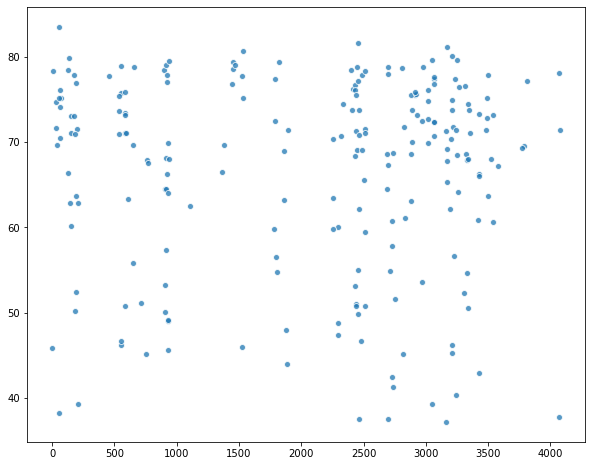

In [133]:
gnp = np.array(country_df['GNP'])
le= np.array(country_df['LifeExpectancy'])
cap = np.array(country_df['Capital'])
pop = np.array(city_df['Population'])

plt.figure(figsize = (10,8))
plt.scatter(y=le, x=cap, alpha = 0.75, edgecolors='white')
plt.xlabel('')

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(y=le, x=cap, alpha = 0.75, edgecolors='white')

In [47]:
num_feat = list(country_df.select_dtypes(include=['int','float']).columns)
num_feat
# sns.heatmap(num_feat)

['IndepYear', 'Population', 'Capital']

In [91]:
asia = country_df[country_df['Continent'] == 'Asia']
europe = country_df[country_df['Continent'] == 'Europe']

In [50]:
asia.LifeExpectancy.describe()

count       51
unique      49
top       71.8
freq         2
Name: LifeExpectancy, dtype: object

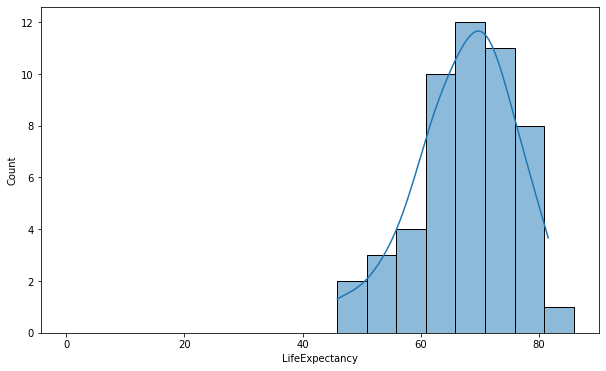

In [115]:
plt.figure(figsize=(10,6))
sns.histplot(asia['LifeExpectancy'],binwidth=5, kde=True)

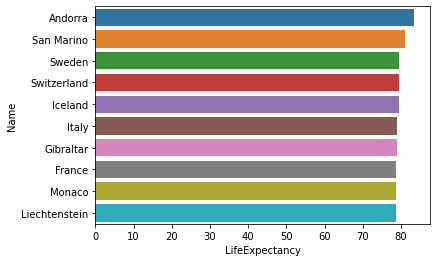

In [112]:
sns.barplot(x = 'LifeExpectancy',y = 'Name',data=europe.sort_values('LifeExpectancy',ascending=False).head(10), orient="h")

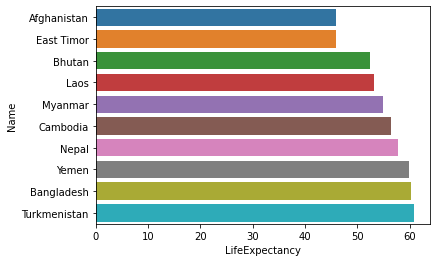

In [114]:
sns.barplot(x = 'LifeExpectancy',y = 'Name',data=asia.sort_values('LifeExpectancy',ascending=True).head(10), orient="h")

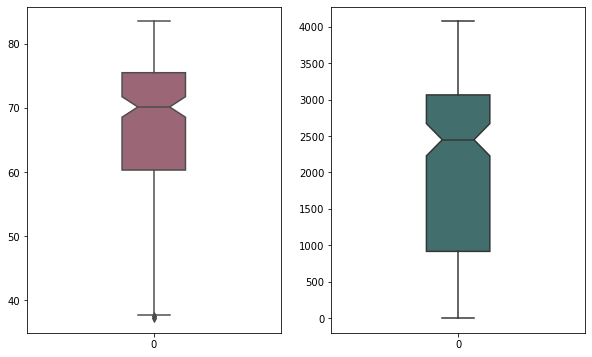

In [153]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.boxplot(data=le,  notch=True, palette='flare', saturation=0.4, width=0.25)
plt.subplot(122)
sns.boxplot(data=cap,  notch=True, palette='viridis', saturation=0.4, width=0.25)


plt.show()

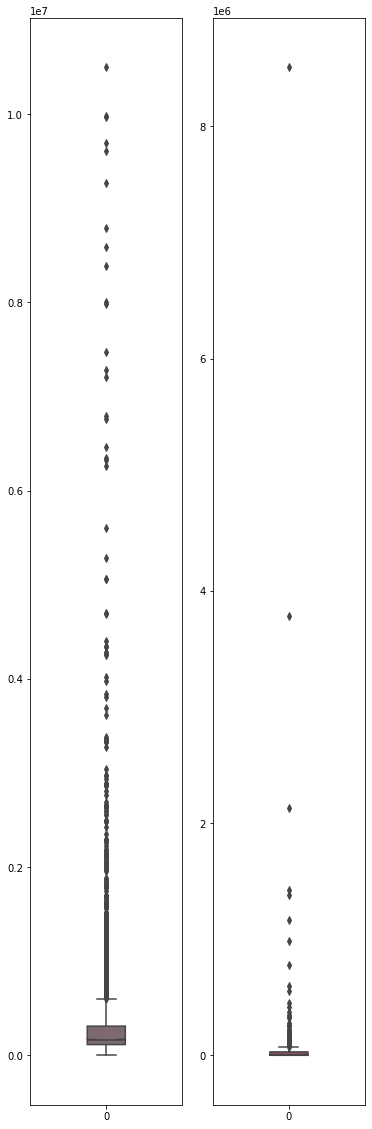

In [161]:
plt.figure(figsize=(6,20))
plt.subplot(121)
sns.boxplot(data=pop,  notch=True, palette='rocket', saturation=0.1, width=0.25)
plt.subplot(122)
sns.boxplot(data=gnp,  notch=True, palette='rocket', saturation=0.4, width=0.25)

In [165]:

europe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, ALB to YUG
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            46 non-null     object 
 1   Continent       46 non-null     object 
 2   Region          46 non-null     object 
 3   SurfaceArea     46 non-null     object 
 4   IndepYear       43 non-null     float64
 5   Population      46 non-null     int64  
 6   LifeExpectancy  44 non-null     object 
 7   GNP             46 non-null     object 
 8   GNPOld          36 non-null     object 
 9   LocalName       46 non-null     object 
 10  GovernmentForm  46 non-null     object 
 11  HeadOfState     45 non-null     object 
 12  Capital         46 non-null     float64
 13  Code2           46 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.4+ KB


In [169]:
europe['GNP'].unique()

array([Decimal('3205.00'), Decimal('1630.00'), Decimal('211860.00'),
       Decimal('249704.00'), Decimal('12178.00'), Decimal('2841.00'),
       Decimal('13714.00'), Decimal('264478.00'), Decimal('55017.00'),
       Decimal('2133367.00'), Decimal('174099.00'), Decimal('553233.00'),
       Decimal('5328.00'), Decimal('121914.00'), Decimal('1424285.00'),
       Decimal('0.00'), Decimal('1378330.00'), Decimal('258.00'),
       Decimal('120724.00'), Decimal('20208.00'), Decimal('48267.00'),
       Decimal('75921.00'), Decimal('8255.00'), Decimal('1161755.00'),
       Decimal('1119.00'), Decimal('10692.00'), Decimal('16321.00'),
       Decimal('6398.00'), Decimal('776.00'), Decimal('1579.00'),
       Decimal('1694.00'), Decimal('3512.00'), Decimal('371362.00'),
       Decimal('145895.00'), Decimal('151697.00'), Decimal('105954.00'),
       Decimal('38158.00'), Decimal('276608.00'), Decimal('510.00'),
       Decimal('20594.00'), Decimal('19756.00'), Decimal('226492.00'),
       Decimal('421

In [188]:
europe['LifeExpectancy'].unique()

array([Decimal('71.6'), Decimal('83.5'), Decimal('77.7'), Decimal('77.8'),
       Decimal('70.9'), Decimal('71.5'), Decimal('68.0'), Decimal('79.6'),
       Decimal('74.5'), Decimal('77.4'), Decimal('76.5'), Decimal('78.8'),
       Decimal('69.5'), Decimal('78.4'), Decimal('79.0'), Decimal('73.7'),
       Decimal('71.4'), Decimal('76.8'), Decimal('79.4'), Decimal('69.1'),
       Decimal('77.1'), Decimal('68.4'), Decimal('64.5'), Decimal('73.8'),
       Decimal('77.9'), Decimal('78.3'), Decimal('78.7'), Decimal('73.2'),
       Decimal('75.8'), Decimal('69.9'), Decimal('67.2'), None,
       Decimal('81.1'), Decimal('74.9'), Decimal('66.0'), Decimal('72.4')],
      dtype=object)

In [189]:
europe['GNP']= europe['GNP'].astype(float)
europe['LifeExpectancy'] = europe['LifeExpectancy'].astype(float)
europe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, ALB to YUG
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            46 non-null     object 
 1   Continent       46 non-null     object 
 2   Region          46 non-null     object 
 3   SurfaceArea     46 non-null     object 
 4   IndepYear       43 non-null     float64
 5   Population      46 non-null     int64  
 6   LifeExpectancy  44 non-null     float64
 7   GNP             46 non-null     float64
 8   GNPOld          36 non-null     object 
 9   LocalName       46 non-null     object 
 10  GovernmentForm  46 non-null     object 
 11  HeadOfState     45 non-null     object 
 12  Capital         46 non-null     float64
 13  Code2           46 non-null     object 
dtypes: float64(4), int64(1), object(9)
memory usage: 6.6+ KB


/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [196]:
asia['GNP']= asia['GNP'].astype(float)
asia['LifeExpectancy'] = asia['LifeExpectancy'].astype(float)
asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, AFG to YEM
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            51 non-null     object 
 1   Continent       51 non-null     object 
 2   Region          51 non-null     object 
 3   SurfaceArea     51 non-null     object 
 4   IndepYear       47 non-null     float64
 5   Population      51 non-null     int64  
 6   LifeExpectancy  51 non-null     float64
 7   GNP             51 non-null     float64
 8   GNPOld          45 non-null     object 
 9   LocalName       51 non-null     object 
 10  GovernmentForm  51 non-null     object 
 11  HeadOfState     51 non-null     object 
 12  Capital         51 non-null     float64
 13  Code2           51 non-null     object 
dtypes: float64(4), int64(1), object(9)
memory usage: 6.0+ KB


/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [215]:
country = country_df.copy()
country['GNP']= country['GNP'].astype(float)
country['LifeExpectancy'] = country['LifeExpectancy'].astype(float)
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, ABW to ZWE
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            239 non-null    object 
 1   Continent       239 non-null    object 
 2   Region          239 non-null    object 
 3   SurfaceArea     239 non-null    object 
 4   IndepYear       192 non-null    float64
 5   Population      239 non-null    int64  
 6   LifeExpectancy  222 non-null    float64
 7   GNP             239 non-null    float64
 8   GNPOld          178 non-null    object 
 9   LocalName       239 non-null    object 
 10  GovernmentForm  239 non-null    object 
 11  HeadOfState     238 non-null    object 
 12  Capital         232 non-null    float64
 13  Code2           239 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 28.0+ KB


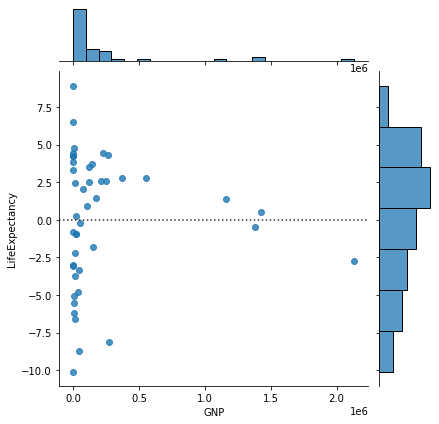

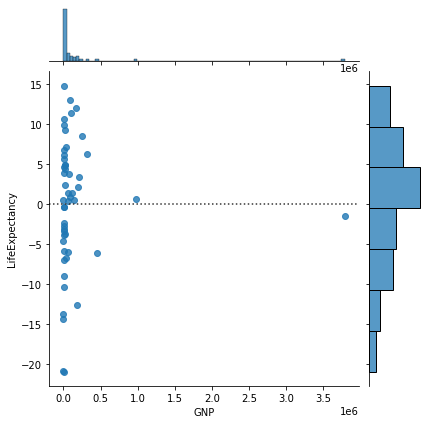

In [207]:

sns.jointplot(x=europe['GNP'], y=europe['LifeExpectancy'], kind='resid')

sns.jointplot(x=asia['GNP'], y=asia['LifeExpectancy'], kind='resid')


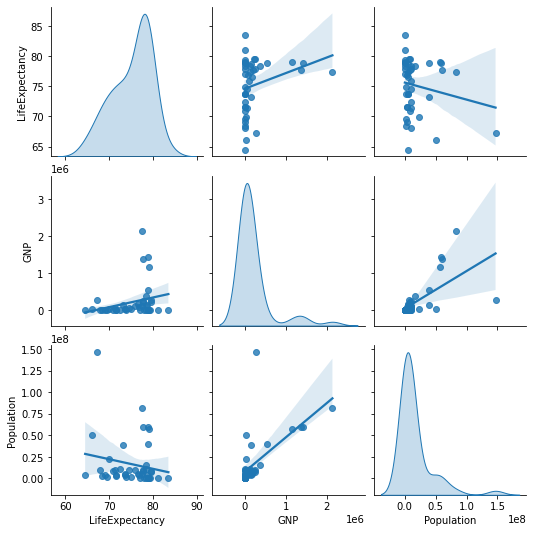

In [218]:
sns.pairplot(europe[['LifeExpectancy','GNP','Population']], palette='rocket', kind='reg', diag_kind='kde')

#only corelates slightly with GNP
#whereas GNP highly correlates with population

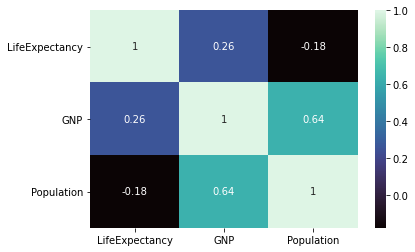

In [211]:
sns.heatmap(europe[['LifeExpectancy','GNP','Population']].corr(),annot=True,cmap='mako')

# GNP only relates with population

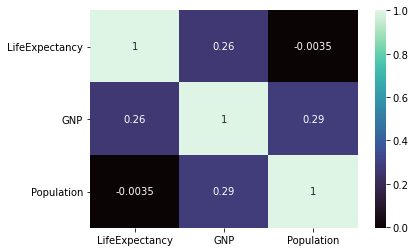

In [213]:
sns.heatmap(asia[['LifeExpectancy','GNP','Population']].corr(),annot=True,cmap='mako')

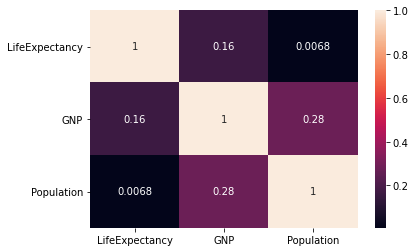

In [217]:
sns.heatmap(country[['LifeExpectancy','GNP','Population']].corr(),annot=True)

# life expectation doesn't affected by GNP or population, it is very low

## __correlation & covariance__

## __descriptive statistics__

## __hypothetical testing__